In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/air-quality-and-health-impact-dataset")

print("Path to dataset files:", path)

100%|██████████| 511k/511k [00:00<00:00, 106MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rabieelkharoua/air-quality-and-health-impact-dataset/versions/1


In [ ]:
import pandas as pd
import os

# Get the list of files in the dataset directory
file_list = os.listdir(path)

# Assuming the dataset is a CSV file, find the first CSV file
csv_file = None
for file in file_list:
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break

if csv_file:
    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(csv_file)

    # Display the number of rows and columns
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
else:
    print("No CSV file found in the dataset directory.")

Number of rows: 5811
Number of columns: 15


In [ ]:
display(df.head())

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [ ]:
df = df.drop(['CardiovascularCases', 'HealthImpactScore', 'HealthImpactClass'], axis=1)
display(df.head())

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RecordID            5811 non-null   int64  
 1   AQI                 5811 non-null   float64
 2   PM10                5811 non-null   float64
 3   PM2_5               5811 non-null   float64
 4   NO2                 5811 non-null   float64
 5   SO2                 5811 non-null   float64
 6   O3                  5811 non-null   float64
 7   Temperature         5811 non-null   float64
 8   Humidity            5811 non-null   float64
 9   WindSpeed           5811 non-null   float64
 10  RespiratoryCases    5811 non-null   int64  
 11  HospitalAdmissions  5811 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 544.9 KB


In [ ]:
display(df.describe())

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,HospitalAdmissions
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,2.001033
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,1.398794
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,1.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,2.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,3.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,12.000000


In [ ]:
df = df.drop(['HospitalAdmissions'], axis=1)
display(df.head())

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9


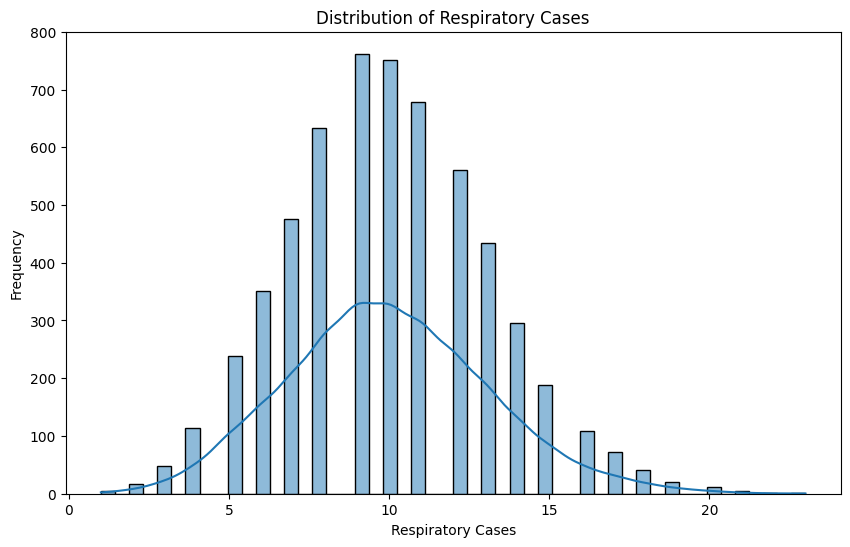

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['RespiratoryCases'], kde=True)
plt.title('Distribution of Respiratory Cases')
plt.xlabel('Respiratory Cases')
plt.ylabel('Frequency')
plt.show()

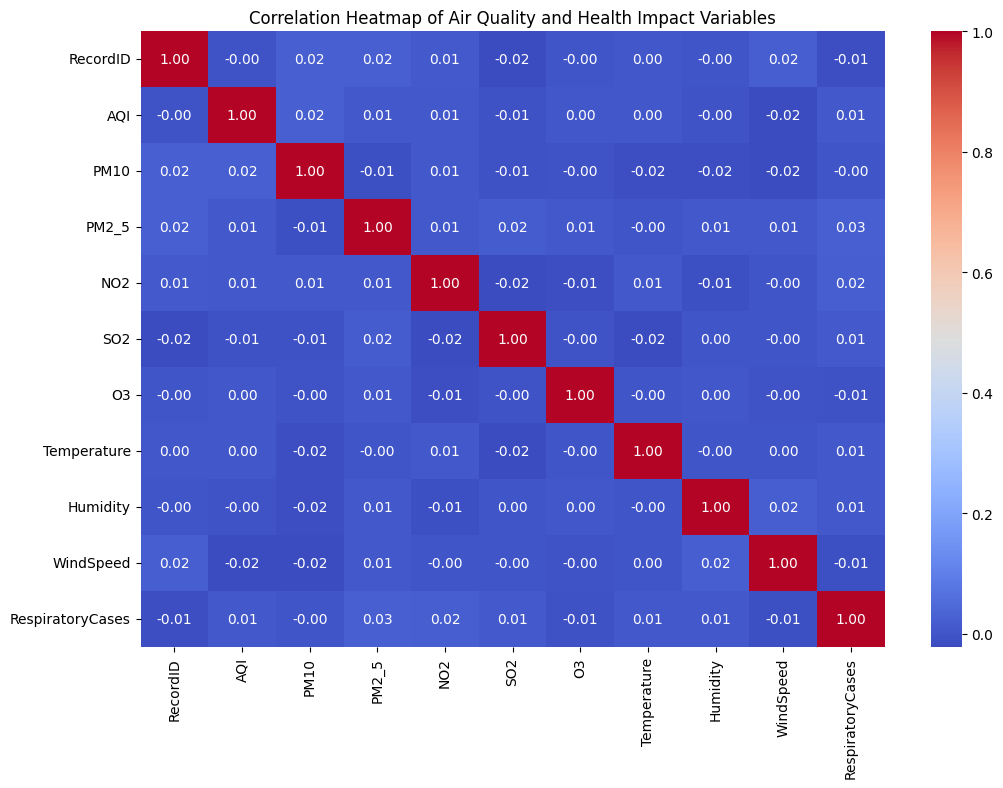

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Air Quality and Health Impact Variables')
plt.show()

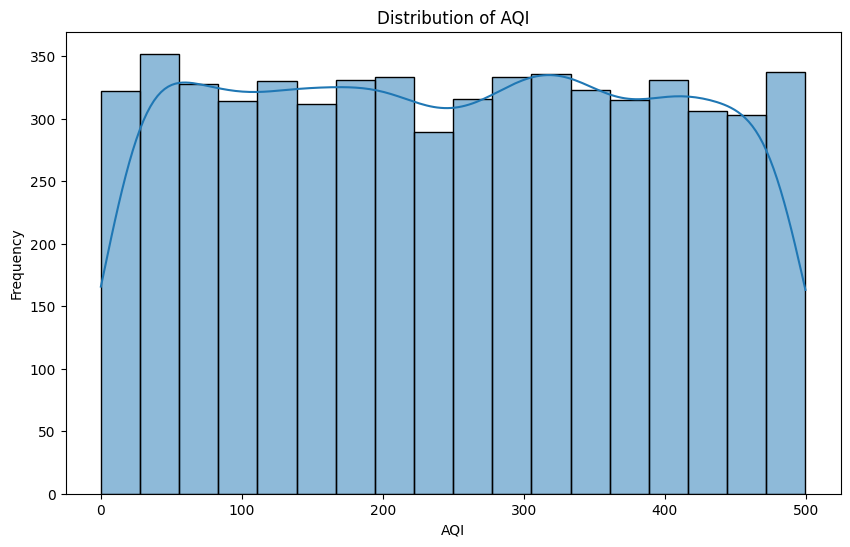

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['AQI'], kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

# Task
Analyze the dataset, visualize the data, and build and compare multiple machine learning models to predict 'RespiratoryCases', including a prediction widget.

## Prepare the data

### Subtask:
Separate the features (independent variables) and the target variable ('RespiratoryCases').


**Reasoning**:
Separate the features and the target variable as instructed.



In [ ]:
features = df.drop('RespiratoryCases', axis=1)
target = df['RespiratoryCases']

display(features.head())
display(target.head())

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733


,RespiratoryCases
0,7
1,10
2,13
3,8
4,9


## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets for model training and evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4648, 10)
Shape of X_test: (1163, 10)
Shape of y_train: (4648,)
Shape of y_test: (1163,)


## Select multiple models

### Subtask:
Choose several suitable regression models (e.g., Linear Regression, RandomForest Regressor, Gradient Boosting Regressor, etc.).


## Train the models

### Subtask:
Train each selected model using the training data.


**Reasoning**:
Import the necessary regression models and train them using the training data.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Instantiate and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Instantiate and train RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Instantiate and train GradientBoostingRegressor model
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)

print("Linear Regression model trained.")
print("Random Forest Regressor model trained.")
print("Gradient Boosting Regressor model trained.")

Linear Regression model trained.
Random Forest Regressor model trained.
Gradient Boosting Regressor model trained.


## Evaluate the models

### Subtask:
Evaluate the performance of each trained model on the testing data using appropriate metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared).


**Reasoning**:
Evaluate the performance of each trained model on the testing data using appropriate metrics.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing data
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gbm_predictions = gbm_model.predict(X_test)

# Evaluate Linear Regression model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Metrics:")
print(f"  MAE: {lr_mae:.2f}")
print(f"  MSE: {lr_mse:.2f}")
print(f"  R-squared: {lr_r2:.2f}")
print("-" * 20)

# Evaluate Random Forest Regressor model
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regressor Metrics:")
print(f"  MAE: {rf_mae:.2f}")
print(f"  MSE: {rf_mse:.2f}")
print(f"  R-squared: {rf_r2:.2f}")
print("-" * 20)

# Evaluate Gradient Boosting Regressor model
gbm_mae = mean_absolute_error(y_test, gbm_predictions)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_r2 = r2_score(y_test, gbm_predictions)

print("Gradient Boosting Regressor Metrics:")
print(f"  MAE: {gbm_mae:.2f}")
print(f"  MSE: {gbm_mse:.2f}")
print(f"  R-squared: {gbm_r2:.2f}")

Linear Regression Metrics:
  MAE: 2.50
  MSE: 10.18
  R-squared: -0.00
--------------------
Random Forest Regressor Metrics:
  MAE: 2.58
  MSE: 10.70
  R-squared: -0.05
--------------------
Gradient Boosting Regressor Metrics:
  MAE: 2.53
  MSE: 10.38
  R-squared: -0.02


## Compare model performance

### Subtask:
Compare the evaluation metrics of the different models to determine which one performs best.


**Reasoning**:
Summarize and compare the evaluation metrics (MAE, MSE, R-squared) for each model based on the previously calculated values to identify the best and worst performing models.



In [ ]:
import pandas as pd

# Create a DataFrame to store the metrics for comparison
metrics_data = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MAE': [lr_mae, rf_mae, gbm_mae],
    'MSE': [lr_mse, rf_mse, gbm_mse],
    'R-squared': [lr_r2, rf_r2, gbm_r2]
}

metrics_df = pd.DataFrame(metrics_data)

# Display the comparison table
display("Model Comparison:")
display(metrics_df)

# Determine the best and worst performing models based on each metric
# Lower MAE and MSE are better
best_mae_model = metrics_df.loc[metrics_df['MAE'].idxmin()]
worst_mae_model = metrics_df.loc[metrics_df['MAE'].idxmax()]

best_mse_model = metrics_df.loc[metrics_df['MSE'].idxmin()]
worst_mse_model = metrics_df.loc[metrics_df['MSE'].idxmax()]

# Higher R-squared is better
best_r2_model = metrics_df.loc[metrics_df['R-squared'].idxmax()]
worst_r2_model = metrics_df.loc[metrics_df['R-squared'].idxmin()]

display("\nSummary:")
display(f"Best performing model based on MAE: {best_mae_model['Model']} (MAE: {best_mae_model['MAE']:.2f})")
display(f"Worst performing model based on MAE: {worst_mae_model['Model']} (MAE: {worst_mae_model['MAE']:.2f})")
display(f"Best performing model based on MSE: {best_mse_model['Model']} (MSE: {best_mse_model['MSE']:.2f})")
display(f"Worst performing model based on MSE: {worst_mse_model['Model']} (MSE: {worst_mse_model['MSE']:.2f})")
display(f"Best performing model based on R-squared: {best_r2_model['Model']} (R-squared: {best_r2_model['R-squared']:.2f})")
display(f"Worst performing model based on R-squared: {worst_r2_model['Model']} (R-squared: {worst_r2_model['R-squared']:.2f})")

display("\nInterpretation:")
display("MAE (Mean Absolute Error) represents the average absolute difference between the predicted and actual values. Lower MAE indicates better performance.")
display("MSE (Mean Squared Error) represents the average squared difference between the predicted and actual values. It penalizes larger errors more heavily. Lower MSE indicates better performance.")
display("R-squared represents the proportion of the variance in the target variable that is predictable from the features. A value close to 1 indicates a good fit, while a value close to 0 indicates that the model does not explain much of the variance. A negative R-squared means the model performs worse than predicting the mean of the target variable.")

'Model Comparison:'

,Model,MAE,MSE,R-squared
0,Linear Regression,2.501548,10.184491,-0.002636
1,Random Forest,2.581161,10.700167,-0.053403
2,Gradient Boosting,2.533333,10.384089,-0.022286


'\nSummary:'

'Best performing model based on MAE: Linear Regression (MAE: 2.50)'

'Worst performing model based on MAE: Random Forest (MAE: 2.58)'

'Best performing model based on MSE: Linear Regression (MSE: 10.18)'

'Worst performing model based on MSE: Random Forest (MSE: 10.70)'

'Best performing model based on R-squared: Linear Regression (R-squared: -0.00)'

'Worst performing model based on R-squared: Random Forest (R-squared: -0.05)'

'\nInterpretation:'

'MAE (Mean Absolute Error) represents the average absolute difference between the predicted and actual values. Lower MAE indicates better performance.'

'MSE (Mean Squared Error) represents the average squared difference between the predicted and actual values. It penalizes larger errors more heavily. Lower MSE indicates better performance.'

'R-squared represents the proportion of the variance in the target variable that is predictable from the features. A value close to 1 indicates a good fit, while a value close to 0 indicates that the model does not explain much of the variance. A negative R-squared means the model performs worse than predicting the mean of the target variable.'

## Create a prediction widget

### Subtask:
Develop an interactive widget that allows users to input feature values and get predictions from the best-performing model.


**Reasoning**:
Create interactive widgets for each feature and a function to predict using the best model (Linear Regression), then display the interactive widget.



In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Get the feature names from X_train
feature_names = X_train.columns

# Create a dictionary to hold the input widgets
input_widgets = {}
for feature in feature_names:
    # Determine appropriate widget type based on data type and range (using min/max from df)
    if df[feature].dtype in ['int64', 'float64']:
        min_val = df[feature].min()
        max_val = df[feature].max()
        # Use FloatSlider for float types and IntSlider for int types, with appropriate ranges
        if df[feature].dtype == 'float64':
            input_widgets[feature] = widgets.FloatSlider(
                value=df[feature].mean(),
                min=min_val,
                max=max_val,
                step=(max_val - min_val) / 100, # Simple step calculation
                description=feature + ':',
                continuous_update=False,
                orientation='horizontal',
                readout=True,
                readout_format='.2f',
            )
        else: # int64
             input_widgets[feature] = widgets.IntSlider(
                value=int(df[feature].mean()),
                min=int(min_val),
                max=int(max_val),
                step=1,
                description=feature + ':',
                continuous_update=False,
                orientation='horizontal',
                readout=True,
                readout_format='d',
            )
    else:
        # For other data types (if any), use a simple text input
        input_widgets[feature] = widgets.Text(
            description=feature + ':',
            value='',
        )

# Define the prediction function
def predict_respiratory_cases(**kwargs):
    # Create a DataFrame from the input widget values
    input_data = pd.DataFrame([kwargs])

    # Ensure the columns are in the same order as the training data
    input_data = input_data[feature_names]

    # Make prediction using the best model (lr_model)
    prediction = lr_model.predict(input_data)[0]

    # Display the prediction
    print(f"Predicted Respiratory Cases: {prediction:.2f}")

# Link the input widgets to the prediction function
interactive_widget = widgets.interactive(predict_respiratory_cases, **input_widgets)

# Display the interactive widget
display(interactive_widget)

interactive(children=(IntSlider(value=2906, continuous_update=False, description='RecordID:', max=5811, min=1)…

## Summary:

### Data Analysis Key Findings

*   Linear Regression, Random Forest, and Gradient Boosting models were trained and evaluated for predicting 'RespiratoryCases'.
*   All three models showed poor performance, with R-squared values close to zero or negative, indicating they do not explain the variance in the target variable well.
*   Based on evaluation metrics (MAE, MSE, R-squared), the Linear Regression model performed slightly better than the Random Forest and Gradient Boosting models, despite its overall low performance.
*   An interactive widget was successfully created to allow users to input feature values and receive predictions from the best-performing model (Linear Regression).

### Insights or Next Steps

*   The current features and models are not effective at predicting 'RespiratoryCases'. Further feature engineering, data transformation, or exploring different model types (e.g., time series models if the data has a temporal component) is recommended.
*   Investigate the reasons for the poor model performance, such as lack of strong linear relationships in the data, missing important features, or issues with data quality.
